## Import Libraries

In [ ]:
!pip install datasist
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.impute import SimpleImputer,KNNImputer
from datasist.structdata import detect_outliers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

%matplotlib inline

**Load and Read Data**

In [ ]:
df_raw=pd.read_csv("/content/Banking-Marketing  Leads Conversion Data.csv")
df_raw

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,31/07/83,30/09/16,C10006,A,COM0000010,A,1.0,4900.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,10,0
69709,APPV80989824738,Female,27/01/71,30/09/16,C10116,C,COM0045789,A,4.0,7190.1,...,N,S122,G,1450.0,NaN,NaN,NaN,NaN,7,0
69710,APPW50697209842,Female,01/02/92,30/09/16,C10022,B,COM0013284,C,4.0,1600.0,...,Y,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0
69711,APPY50870035036,Male,27/06/78,30/09/16,C10002,A,COM0000098,C,3.0,9893.0,...,Y,S122,G,1366.0,80000.0,5.0,NaN,NaN,10,0


## Business Understanding 

Banks face a problem with their customers, which is related to taking loans from the bank based on their data

**Bussiness Case**:

Determining the status of the applicant for a loan from the bank

**Question**:

Is the customer qualified for a loan from the bank ?

**Machine Learning Problem** :Classification

1) 1   ->> Approved

2) 0   ->> Not Approved

Target : Approved

## Data Definition

In [ ]:
df=df_raw.copy()
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [ ]:
df.shape

(69713, 22)

In [ ]:
df.size

1533686

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

##Feature Engineering

**Domain Knowledge Features**

In [ ]:
df["DOB"]

0        23/07/79
1        07/12/86
2        10/12/82
3        30/01/89
4        19/04/85
           ...   
69708    31/07/83
69709    27/01/71
69710    01/02/92
69711    27/06/78
69712    31/12/89
Name: DOB, Length: 69713, dtype: object

In [ ]:
def d(x):
  try:
     return x.replace(x.split("/")[2],"19"+x.split("/")[2])
  except:
    return x

df["DOB"]=df["DOB"].apply(d)

In [ ]:
df["DOB"]

0        23/07/1979
1        07/12/1986
2        10/12/1982
3        30/01/1989
4        19/04/1985
            ...    
69708    31/07/1983
69709    27/01/1971
69710    01/02/1992
69711    27/06/1978
69712    31/12/1989
Name: DOB, Length: 69713, dtype: object

In [ ]:
df["DOB"]=pd.to_datetime(df["DOB"],format="%d/%m/%Y")
df["DOB"]

0       1979-07-23
1       1986-12-07
2       1982-12-10
3       1989-01-30
4       1985-04-19
           ...    
69708   1983-07-31
69709   1971-01-27
69710   1992-02-01
69711   1978-06-27
69712   1989-12-31
Name: DOB, Length: 69713, dtype: datetime64[ns]

In [ ]:
current_year=date.today()
current_year

datetime.date(2022, 10, 2)

In [ ]:
def age (x):
    current_year=date.today().year
    return current_year-x.year

df["age"]=df["DOB"].apply(age)
df["age"]

0        43.0
1        36.0
2        40.0
3        33.0
4        37.0
         ... 
69708    39.0
69709    51.0
69710    30.0
69711    44.0
69712    33.0
Name: age, Length: 69713, dtype: float64

In [ ]:
 df[["Loan_Amount" ,"Interest_Rate"]]

,Loan_Amount,Interest_Rate
0,NaN,NaN
1,20000.0,13.25
2,45000.0,NaN
3,92000.0,NaN
4,50000.0,NaN
...,...,...
69708,NaN,NaN
69709,NaN,NaN
69710,24000.0,35.50
69711,80000.0,NaN


In [ ]:
df["Loan_Amount"]

0            NaN
1        20000.0
2        45000.0
3        92000.0
4        50000.0
          ...   
69708        NaN
69709        NaN
69710    24000.0
69711    80000.0
69712    69000.0
Name: Loan_Amount, Length: 69713, dtype: float64

In [ ]:
df["Interest_Rate"]

0          NaN
1        13.25
2          NaN
3          NaN
4          NaN
         ...  
69708      NaN
69709      NaN
69710    35.50
69711      NaN
69712    13.99
Name: Interest_Rate, Length: 69713, dtype: float64

In [ ]:
df["Interest_Rate"].fillna(0,inplace=True)
df["Interest_Rate"]

0         0.00
1        13.25
2         0.00
3         0.00
4         0.00
         ...  
69708     0.00
69709     0.00
69710    35.50
69711     0.00
69712    13.99
Name: Interest_Rate, Length: 69713, dtype: float64

In [ ]:
def loan(x):
    return x["Loan_Amount"]+ ( (x["Interest_Rate"]/100) * x["Loan_Amount"]  )
df["Loan_After_Interest"]=df.apply(loan,axis="columns")
df["Loan_After_Interest"]

0            NaN
1        22650.0
2        45000.0
3        92000.0
4        50000.0
          ...   
69708        NaN
69709        NaN
69710    32520.0
69711    80000.0
69712    78653.1
Name: Loan_After_Interest, Length: 69713, dtype: float64

**Date and Time Features**

In [ ]:
df["Lead_Creation_Date"]

0        15/07/16
1        04/07/16
2        19/07/16
3        09/07/16
4        20/07/16
           ...   
69708    30/09/16
69709    30/09/16
69710    30/09/16
69711    30/09/16
69712    30/09/16
Name: Lead_Creation_Date, Length: 69713, dtype: object

In [ ]:
df["Lead_Creation_Date"]=pd.to_datetime(df["Lead_Creation_Date"],format="%d/%m/%y")
df["Lead_Creation_Date"]

0       2016-07-15
1       2016-07-04
2       2016-07-19
3       2016-07-09
4       2016-07-20
           ...    
69708   2016-09-30
69709   2016-09-30
69710   2016-09-30
69711   2016-09-30
69712   2016-09-30
Name: Lead_Creation_Date, Length: 69713, dtype: datetime64[ns]

In [ ]:
df["month"]=df["Lead_Creation_Date"].dt.month
df["day_no"]=df["Lead_Creation_Date"].dt.day
df["day_name"]=df["Lead_Creation_Date"].dt.day_name()

In [ ]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Loan_Period,Interest_Rate,EMI,Var1,Approved,age,Loan_After_Interest,month,day_no,day_name
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,...,NaN,0.00,NaN,0,0,43.0,NaN,7,15,Friday
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,1.0,3500.0,...,2.0,13.25,953.0,10,0,36.0,22650.0,7,4,Monday
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,...,4.0,0.00,NaN,0,0,40.0,45000.0,7,19,Tuesday
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,...,5.0,0.00,NaN,7,0,33.0,92000.0,7,9,Saturday
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,...,2.0,0.00,NaN,10,0,37.0,50000.0,7,20,Wednesday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   69713 non-null  object        
 1   Gender                               69713 non-null  object        
 2   DOB                                  69698 non-null  datetime64[ns]
 3   Lead_Creation_Date                   69713 non-null  datetime64[ns]
 4   City_Code                            68899 non-null  object        
 5   City_Category                        68899 non-null  object        
 6   Employer_Code                        65695 non-null  object        
 7   Employer_Category1                   65695 non-null  object        
 8   Employer_Category2                   65415 non-null  float64       
 9   Monthly_Income                       69713 non-null  float64       
 10  Customer_E

##Exaploratoty Data Analysis

**Univarite Analysis**

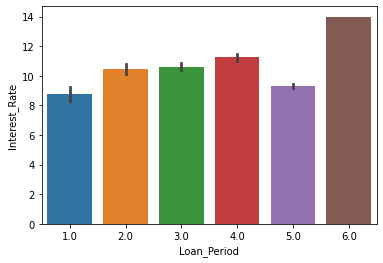

In [ ]:
sns.barplot(x="Loan_Period",y="Interest_Rate",data=df)

The higher the number of loan repayments, the higher the interest rate

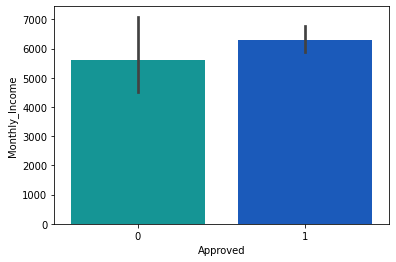

In [ ]:
sns.barplot(x="Approved",y="Monthly_Income",data=df,palette="winter_r")

The higher the monthly income, the higher the probability of accepting the loan

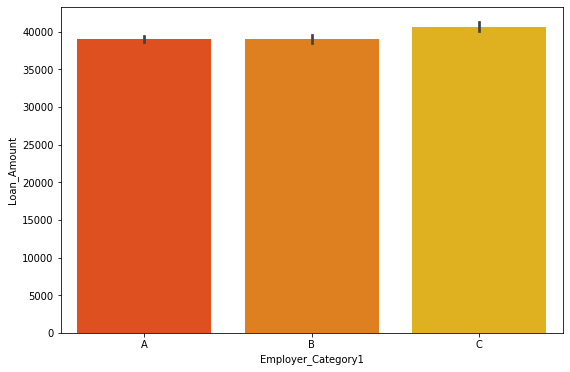

In [ ]:
plt.figure(figsize=[9,6])
sns.barplot(x="Employer_Category1",y="Loan_Amount",data=df,order=["A","B","C"],palette="autumn")

Category C is the category of clients with the most large loans, while the same in both categories A and B

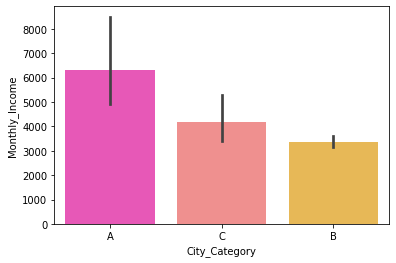

In [ ]:
sns.barplot(x="City_Category",y="Monthly_Income",data=df,palette="spring")

Clients who live in city A have the highest monthly income

Text(0.5, 1.0, 'Var1')

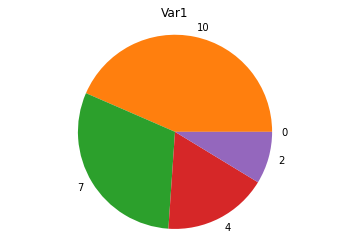

In [ ]:
plt.pie(df["Var1"].dropna().unique(),labels=df["Var1"].dropna().unique())
plt.axis("equal")
plt.title("Var1")

Var1 10 customers are the most frequented in the bank

Text(0.5, 1.0, 'Employer_Category2')

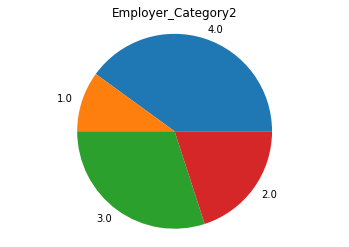

In [ ]:
plt.pie(df["Employer_Category2"].dropna().unique(),labels=df["Employer_Category2"].dropna().unique())
plt.axis("equal")
plt.title("Employer_Category2")

Category 4 customers are the most frequented in the bank

Text(0.5, 1.0, 'month')

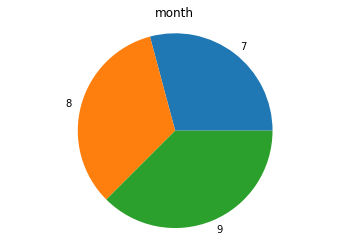

In [ ]:
plt.pie(df["month"].dropna().unique(),labels=df["month"].dropna().unique())
plt.axis("equal")
plt.title("month")

The number of new customers is equal every month

**Bivariate Analysis**

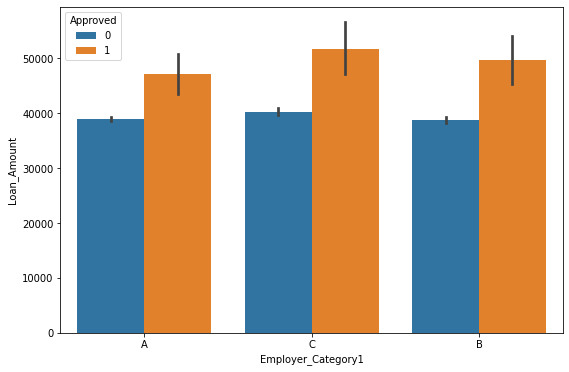

In [ ]:
plt.figure(figsize=[9,6])
sns.barplot(x="Employer_Category1",y="Loan_Amount",data=df,hue="Approved")

Category C customers are the most accepting of loans

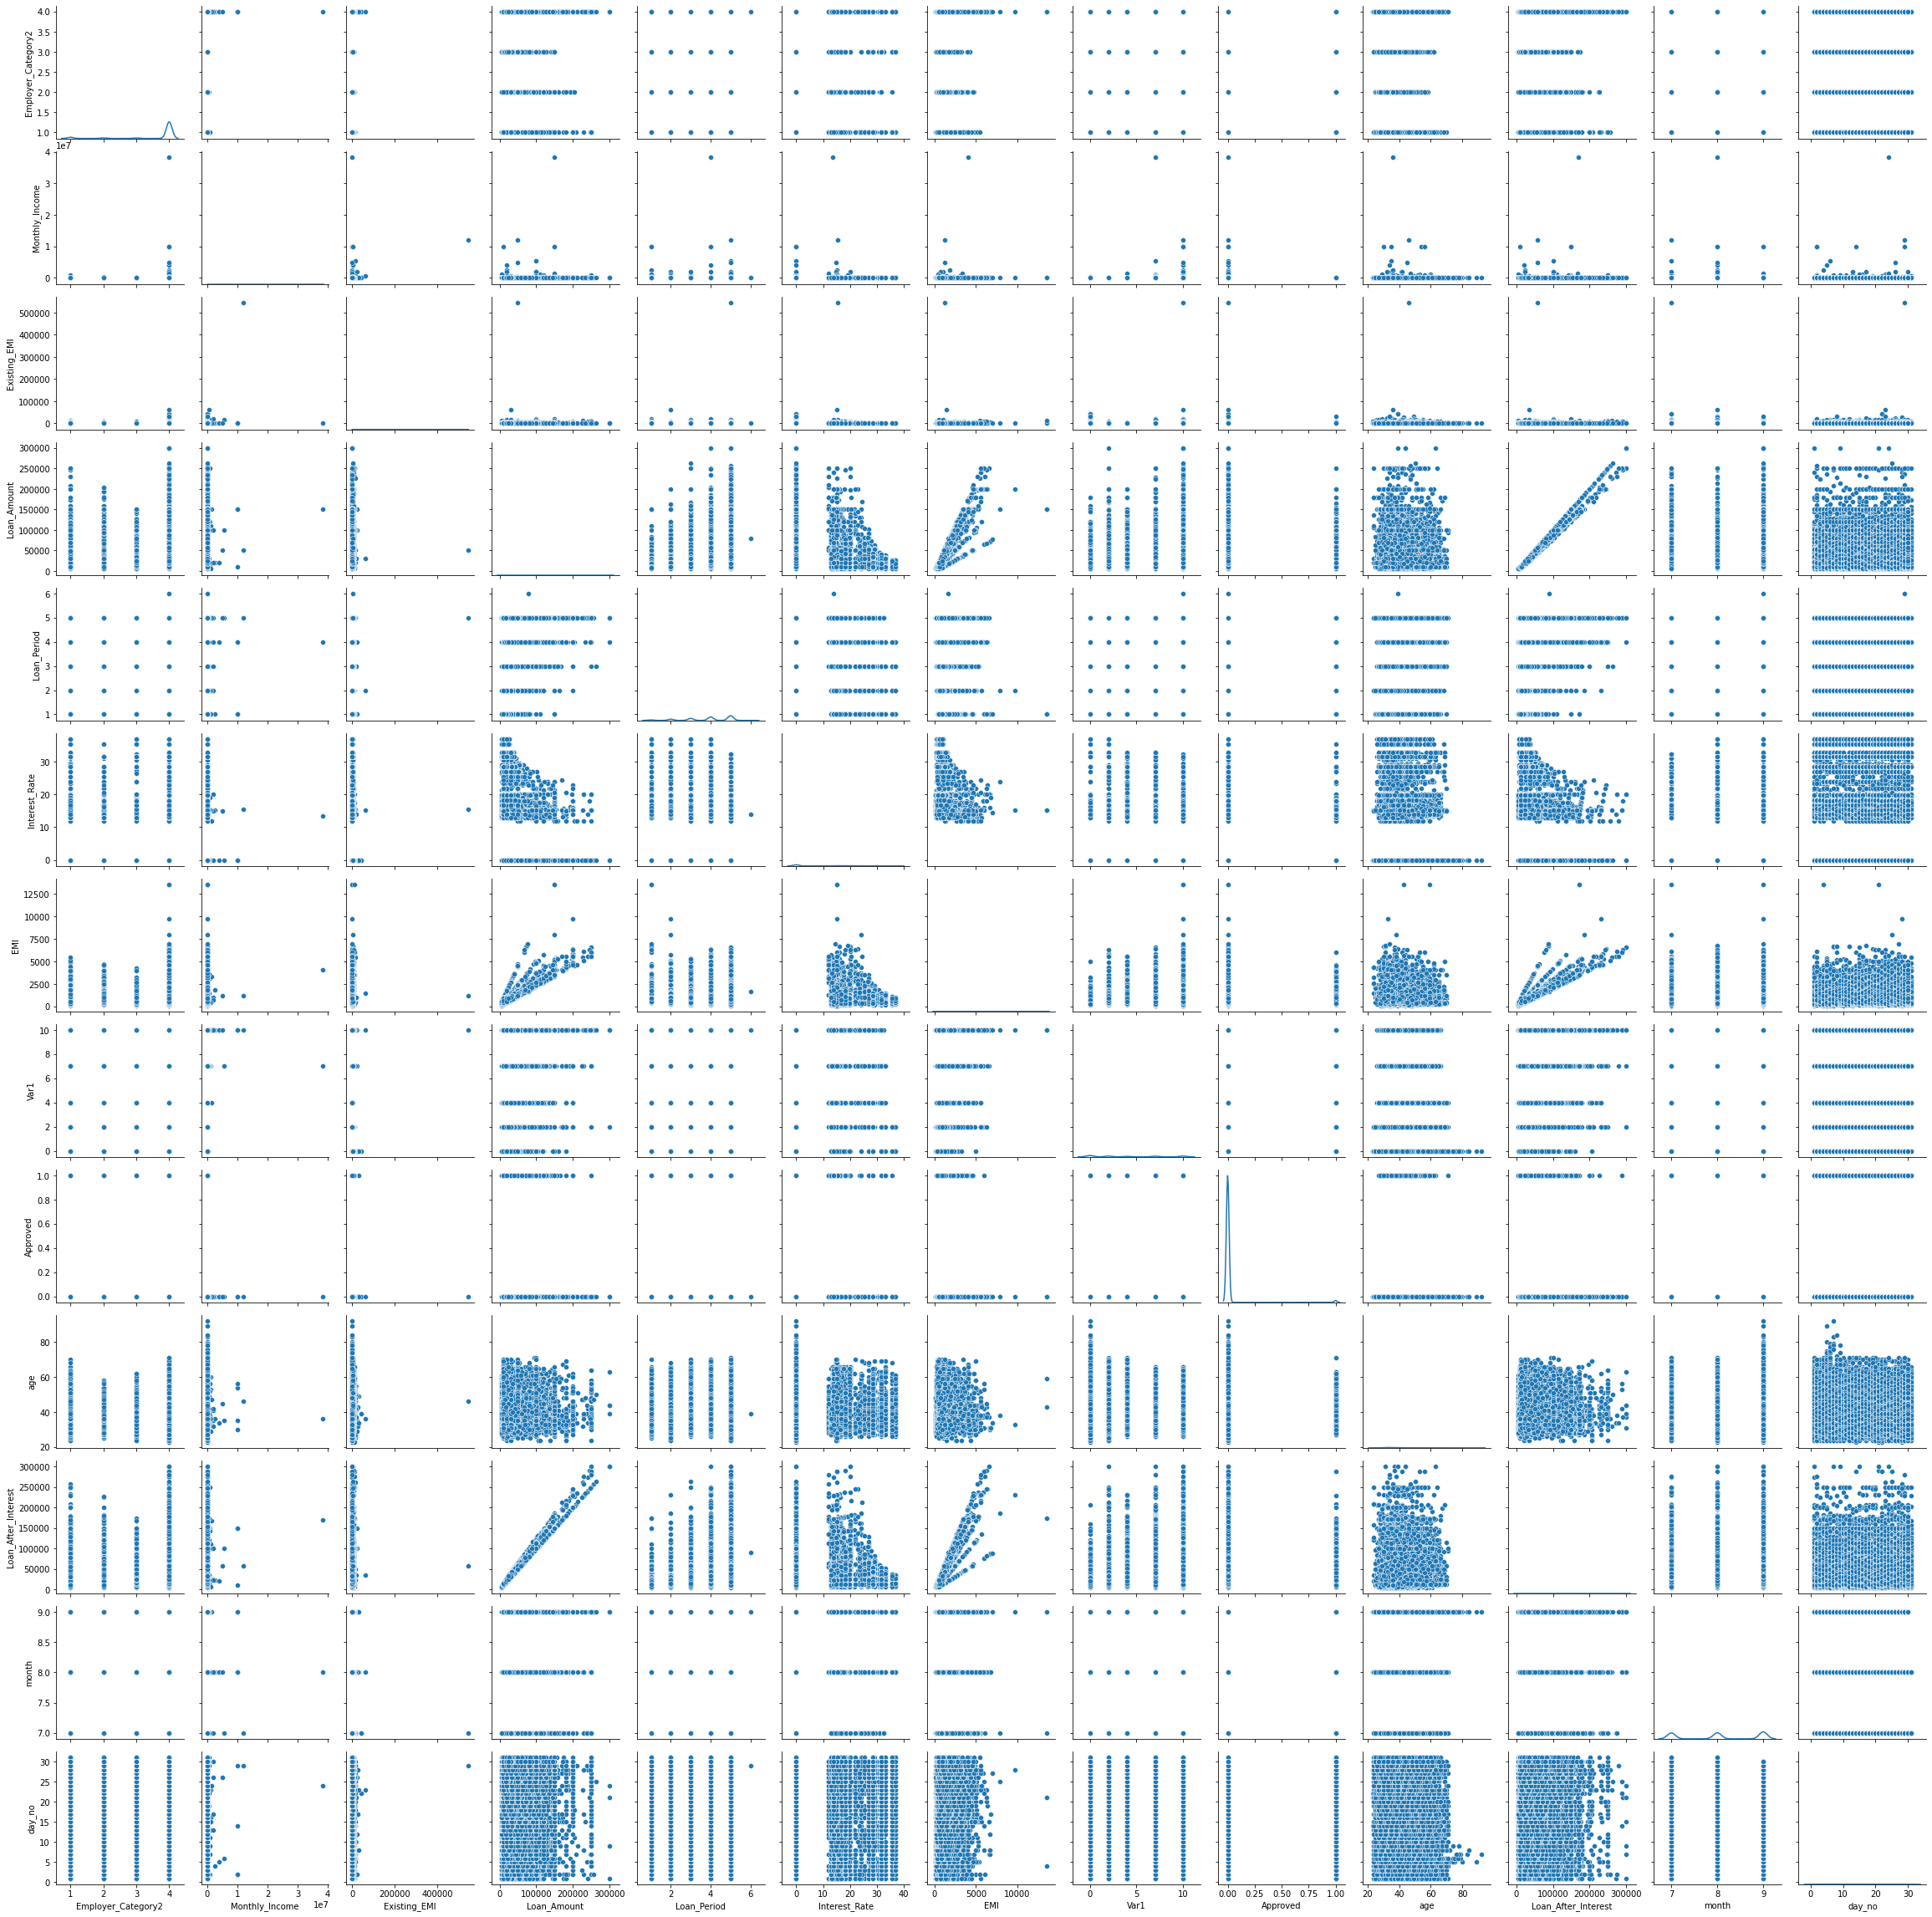

In [ ]:
x=sns.PairGrid(df)
x=x.map_diag(sns.kdeplot)
x=x.map_offdiag(sns.scatterplot)

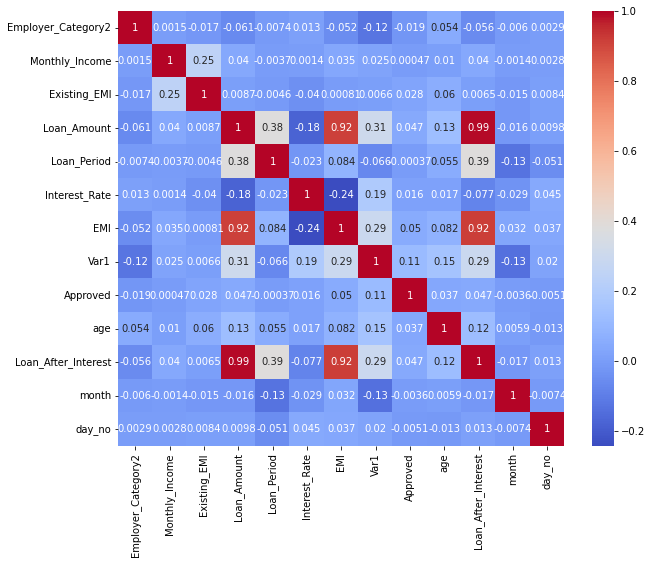

In [ ]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

-There is a strong positive correlation between EMI and Loan Amount

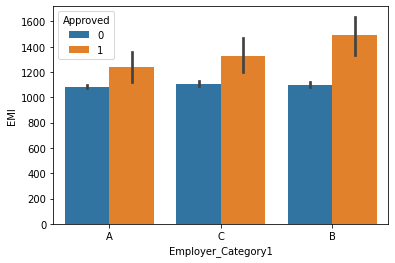

In [ ]:
sns.barplot(x="Employer_Category1",y="EMI",data=df,hue="Approved")

Category B clients are the most accepting of loans for EMI

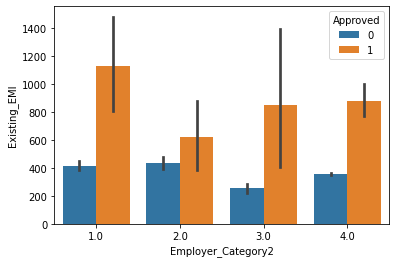

In [ ]:
sns.barplot(x="Employer_Category2",y="Existing_EMI",data=df,hue="Approved")

Category 1 clients are the most accepting of loans for Existing EMI

**Analysis Question**

**1) What is gender of the applicant that most frequent ?**

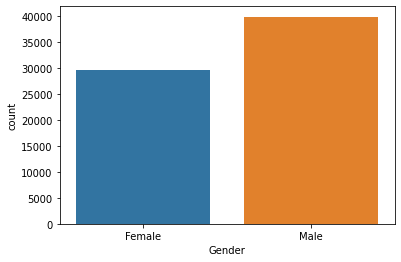

In [ ]:
sns.countplot(x="Gender",data=df)

In [ ]:
df.groupby("Gender")[["ID"]].count()

,ID
Gender,
Female,29764
Male,39949


-The number of male clients more than female


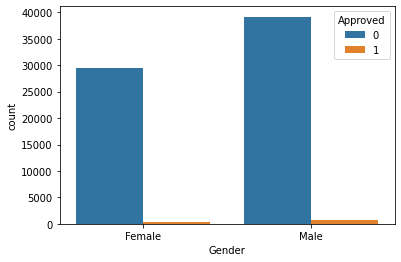

In [ ]:
sns.countplot(x="Gender",hue="Approved",data=df)

In [ ]:
df.groupby(["Gender","Approved"])[["ID"]].count()

ID
Gender Approved       
Female 0         29516
       1           248
Male   0         39177
       1           772

**2) What is average monthly income for each gender?**


In [ ]:
n=df.groupby("Gender")[["Monthly_Income"]].mean()
n

,Monthly_Income
Gender,
Female,3010.912985
Male,7567.884418


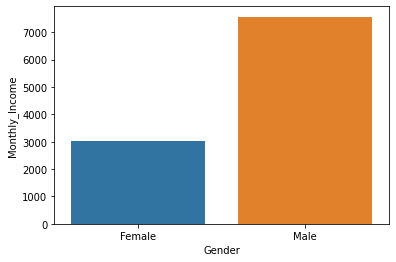

In [ ]:
sns.barplot(x=n.index,y=n["Monthly_Income"])

3) IS loan amount affect EMI ?

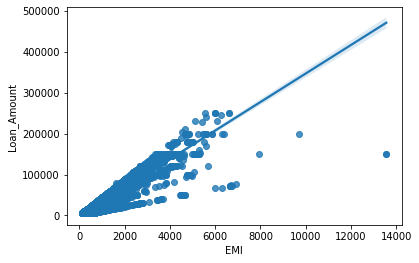

In [ ]:
sns.regplot(x="EMI",y="Loan_Amount",data=df)

There are a positive correlation between Loan Amount and EMI

**4) Is age of applicant affect approved ?**

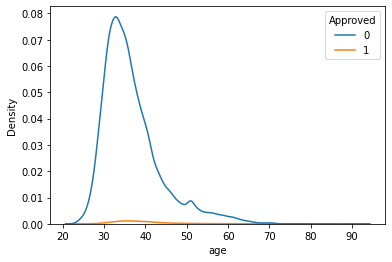

In [ ]:
sns.kdeplot(data=df,x="age",hue="Approved")

age of client don't affect approve the loan

**5) At what age is the demand for loan ?**

In [ ]:
d=df["age"].value_counts().head()
d

33.0    5728
32.0    5451
34.0    5289
35.0    5184
31.0    5091
Name: age, dtype: int64

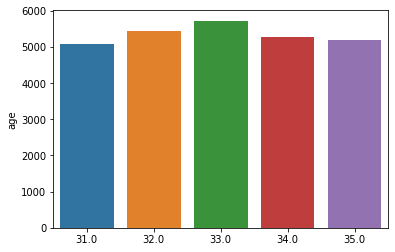

In [ ]:
sns.barplot(x=d.index,y=d)

**6)What is The largest loan value taken by customers in every city ?**

In [ ]:
v=df.groupby("City_Category")[["Loan_Amount"]].max()
v

,Loan_Amount
City_Category,
A,300000.0
B,300000.0
C,250000.0


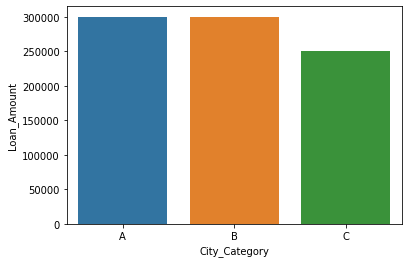

In [ ]:
sns.barplot(x=v.index,y=v["Loan_Amount"])

**7)What is the total monthly income of customers from each city ?**


In [ ]:
v=df.groupby("City_Category")[["Monthly_Income"]].sum()
v

,Monthly_Income
City_Category,
A,315389870.7
B,24554496.8
C,48868235.0


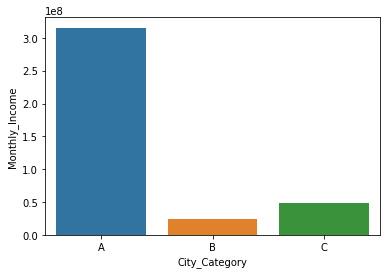

In [ ]:
sns.barplot(x=v.index,y=v["Monthly_Income"])

**8) What is Primary Bank Type is most frequent ?**

In [ ]:
x=df.groupby("Primary_Bank_Type")[["ID"]].count()
x

,ID
Primary_Bank_Type,
G,20703
P,39619


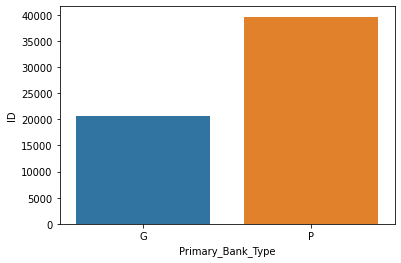

In [ ]:
sns.barplot(x=x.index,y=x["ID"])

**9)What is the highest and Lowest interest rate?**

In [ ]:
print(df["Interest_Rate"].max())
df["Interest_Rate"].min()

37.0


0.0

**10)The most accepted and rejected source category for loans ?**

In [ ]:
x=df.groupby(["Source_Category","Approved"])[["ID"]].count()
x

ID
Source_Category Approved       
A               0             3
B               0         29317
                1           495
C               0         11234
                1           140
D               0           497
E               0          1035
                1            15
F               0           453
                1             6
G               0         26154
                1           364

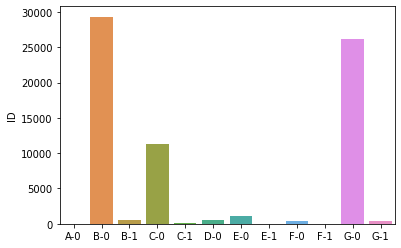

In [ ]:
a=list(x.index)
d=[]
for i in a:
    d.append( i[0]+"-"+str(i[1]) )
sns.barplot(x=d,y=x["ID"])

-source category B is the most rejected and accepted for loans

##Data Cleaning

In [ ]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Loan_Period,Interest_Rate,EMI,Var1,Approved,age,Loan_After_Interest,month,day_no,day_name
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,...,NaN,0.00,NaN,0,0,43.0,NaN,7,15,Friday
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,1.0,3500.0,...,2.0,13.25,953.0,10,0,36.0,22650.0,7,4,Monday
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,...,4.0,0.00,NaN,0,0,40.0,45000.0,7,19,Tuesday
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,...,5.0,0.00,NaN,7,0,33.0,92000.0,7,9,Saturday
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,10000.0,...,2.0,0.00,NaN,10,0,37.0,50000.0,7,20,Wednesday


**Handle Data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   69713 non-null  object        
 1   Gender                               69713 non-null  object        
 2   DOB                                  69698 non-null  datetime64[ns]
 3   Lead_Creation_Date                   69713 non-null  datetime64[ns]
 4   City_Code                            68899 non-null  object        
 5   City_Category                        68899 non-null  object        
 6   Employer_Code                        65695 non-null  object        
 7   Employer_Category1                   65695 non-null  object        
 8   Employer_Category2                   65415 non-null  float64       
 9   Monthly_Income                       69713 non-null  float64       
 10  Customer_E

**Check Duplicates**

In [ ]:
df.duplicated().sum()

0

**Detect and Handle the Missing Data**

In [ ]:
df.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                              0
EMI                                    47437
Var1                                       0
Approved                                   0
age       

In [ ]:
#How Many Total Missing Values do we have ?
total_missing=df.isna().sum().sum()
total_cells=np.product(df.shape)
#Percent of data that is missing
percent_missing= (total_missing/total_cells)*100
percent_missing

8.680510728909162

Drop null values in "DOB" and "age"

In [ ]:
df.dropna(subset=["DOB"],inplace=True)
df.dropna(subset=["age"],inplace=True)

Fill null Values

In [ ]:
#Categorical Features
df["City_Code"].fillna(df["City_Code"].mode()[0],inplace=True)                            
df["City_Category"].fillna(df["City_Category"].mode()[0],inplace=True)              
df["Employer_Code"].fillna(df["Employer_Code"].mode()[0],inplace=True)                   

In [ ]:
impute=SimpleImputer(strategy="most_frequent",missing_values=np.nan)

impute.fit_transform( df[["Employer_Category1"]] )
df["Employer_Category1"]=impute.transform(df[["Employer_Category1"]])

impute.fit_transform( df[["Customer_Existing_Primary_Bank_Code"]] )
df["Customer_Existing_Primary_Bank_Code"]=impute.transform(df[["Customer_Existing_Primary_Bank_Code"]])

impute.fit_transform( df[["Primary_Bank_Type"]] )
df["Primary_Bank_Type"]=impute.transform(df[["Primary_Bank_Type"]])

In [ ]:
#Numerical Features
df["Employer_Category2"].fillna(df["Employer_Category2"].median(),inplace=True)
df["Existing_EMI"].fillna(df["Existing_EMI"].median(),inplace=True)                          
df["Loan_Amount"].fillna(df["Loan_Amount"].median(),inplace=True)

In [ ]:
impute=SimpleImputer(strategy="median",missing_values=np.nan)

impute.fit( df[["Loan_Period"]] )
df["Loan_Period"] = impute.transform( df[["Loan_Period"]] )

impute.fit( df[["EMI"]] )
df["EMI"] = impute.transform( df[["EMI"]] )                                   

In [ ]:
knn=KNNImputer(n_neighbors=5,missing_values=np.nan)

knn.fit(df[["Loan_After_Interest"]])
df["Loan_After_Interest"]=knn.transform(df[["Loan_After_Interest"]])

In [ ]:
df.isnull().sum()

ID                                     0
Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Code                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Interest_Rate                          0
EMI                                    0
Var1                                   0
Approved                               0
age                                    0
Loan_After_Interest                    0
month           

**Detect and Handle Outliers**

In [ ]:
df.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,age,Loan_After_Interest,month,day_no
count,69698.000000,6.969800e+04,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000,69698.000000
mean,3.737381,5.623481e+03,360.742326,35683.046859,3.934087,6.140800,992.286206,3.949296,0.014635,36.739863,42875.024369,8.059428,16.040489
std,0.785055,1.747858e+05,2287.941514,24296.273313,0.907909,9.550138,432.031637,3.819185,0.120086,7.086845,25385.923722,0.821605,8.942176
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,0.000000,118.000000,0.000000,0.000000,23.000000,5000.000000,7.000000,1.000000
25%,4.000000,1.650000e+03,0.000000,30000.000000,4.000000,0.000000,941.000000,0.000000,0.000000,32.000000,30000.000000,7.000000,8.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,0.000000,941.000000,2.000000,0.000000,35.000000,42875.024369,8.000000,16.000000
75%,4.000000,4.000000e+03,350.000000,36000.000000,4.000000,14.850000,941.000000,7.000000,0.000000,40.000000,42875.024369,9.000000,24.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000,92.000000,300000.000000,9.000000,31.000000


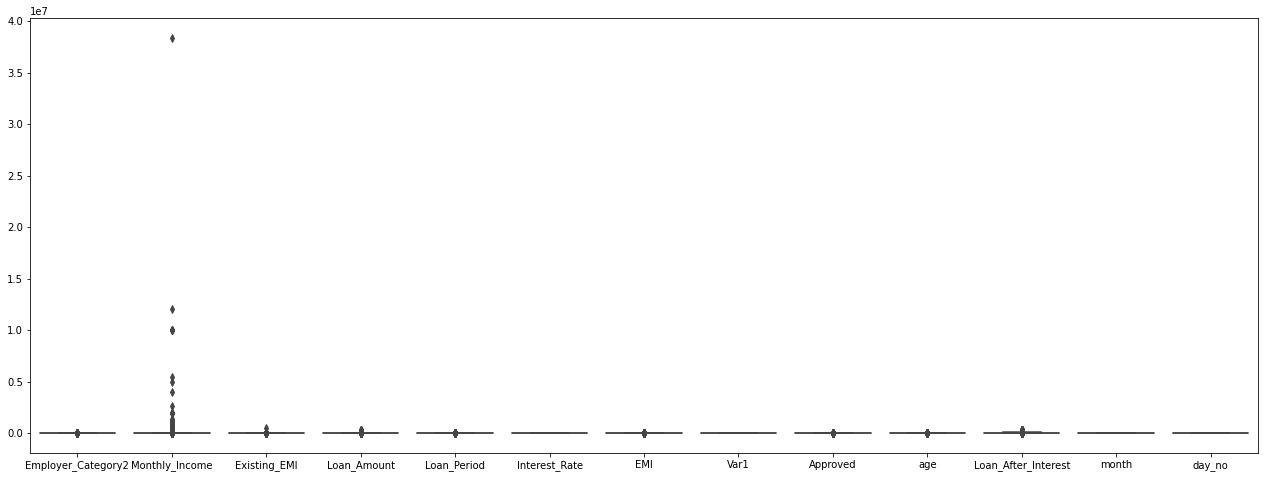

In [ ]:
plt.figure(figsize=[22,8])
sns.boxplot(data=df)

In [ ]:
indies=detect_outliers(df,0,df.describe().columns)
len(indies)

47638

In [ ]:
col=df.describe().columns.tolist()
col.remove("Approved")
col

['Employer_Category2',
 'Monthly_Income',
 'Existing_EMI',
 'Loan_Amount',
 'Loan_Period',
 'Interest_Rate',
 'EMI',
 'Var1',
 'age',
 'Loan_After_Interest',
 'month',
 'day_no']

In [ ]:
for i in col:
    indies=detect_outliers(df,0,[i])
    df[i].loc[indies]=df[i].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

#Data Preprocessing

In [ ]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Loan_Period,Interest_Rate,EMI,Var1,Approved,age,Loan_After_Interest,month,day_no,day_name
0,APPC90493171225,Female,1979-07-23,2016-07-15,C10001,A,COM0044082,A,4.0,2000.0,...,4.0,0.00,941.0,0,0,43.0,42875.024369,7,15,Friday
1,APPD40611263344,Male,1986-12-07,2016-07-04,C10003,A,COM0000002,C,4.0,3500.0,...,4.0,13.25,941.0,10,0,36.0,22650.000000,7,4,Monday
2,APPE70289249423,Male,1982-12-10,2016-07-19,C10125,C,COM0005267,C,4.0,2250.0,...,4.0,0.00,941.0,0,0,40.0,45000.000000,7,19,Tuesday
3,APPF80273865537,Male,1989-01-30,2016-07-09,C10477,C,COM0004143,A,4.0,3500.0,...,4.0,0.00,941.0,7,0,33.0,42875.024369,7,9,Saturday
4,APPG60994436641,Male,1985-04-19,2016-07-20,C10002,A,COM0001781,A,4.0,2500.0,...,4.0,0.00,941.0,10,0,37.0,50000.000000,7,20,Wednesday


**Split Data to Input and Output**

In [66]:
x=df.drop(["ID","DOB","Lead_Creation_Date","City_Code","Employer_Code","Customer_Existing_Primary_Bank_Code","Source","Approved"],axis=1)#input
y=df["Approved"]  #output

In [ ]:
x

,Gender,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,age,Loan_After_Interest,month,day_no,day_name
0,Female,A,A,4.0,2000.0,P,N,G,0.0,30000.0,4.0,0.00,941.0,0,43.0,42875.024369,7,15,Friday
1,Male,A,C,4.0,3500.0,P,Y,G,0.0,30000.0,4.0,13.25,941.0,10,36.0,22650.000000,7,4,Monday
2,Male,C,C,4.0,2250.0,G,Y,B,0.0,45000.0,4.0,0.00,941.0,0,40.0,45000.000000,7,19,Tuesday
3,Male,C,A,4.0,3500.0,G,Y,B,0.0,30000.0,4.0,0.00,941.0,7,33.0,42875.024369,7,9,Saturday
4,Male,A,A,4.0,2500.0,P,Y,B,0.0,30000.0,4.0,0.00,941.0,10,37.0,50000.000000,7,20,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,Female,A,A,4.0,4900.0,P,N,G,0.0,30000.0,4.0,0.00,941.0,10,39.0,42875.024369,9,30,Friday
69709,Female,C,A,4.0,7190.1,P,N,G,0.0,30000.0,4.0,0.00,941.0,7,51.0,42875.024369,9,30,Friday
69710,Female,B,C,4.0,1600.0,P,Y,G,0.0,24000.0,4.0,35.50,941.0,2,30.0,32520.000000,9,30,Friday
69711,Male,A,C,4.0,2500.0,P,Y,G,0.0,30000.0,4.0,0.00,941.0,10,44.0,42875.024369,9,30,Friday


In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
69708    0
69709    0
69710    0
69711    0
69712    0
Name: Approved, Length: 69698, dtype: int64

**Work with Categorical Features**

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69698 entries, 0 to 69712
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               69698 non-null  object 
 1   City_Category        69698 non-null  object 
 2   Employer_Category1   69698 non-null  object 
 3   Employer_Category2   69698 non-null  float64
 4   Monthly_Income       69698 non-null  float64
 5   Primary_Bank_Type    69698 non-null  object 
 6   Contacted            69698 non-null  object 
 7   Source_Category      69698 non-null  object 
 8   Existing_EMI         69698 non-null  float64
 9   Loan_Amount          69698 non-null  float64
 10  Loan_Period          69698 non-null  float64
 11  Interest_Rate        69698 non-null  float64
 12  EMI                  69698 non-null  float64
 13  Var1                 69698 non-null  int64  
 14  age                  69698 non-null  float64
 15  Loan_After_Interest  69698 non-null 

In [ ]:
x=pd.get_dummies(data=x,columns=["Gender","City_Category","Employer_Category1","day_name"],drop_first=True)
x

,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,4.0,2000.0,P,N,G,0.0,30000.0,4.0,0.00,941.0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,3500.0,P,Y,G,0.0,30000.0,4.0,13.25,941.0,...,0,0,0,1,1,0,0,0,0,0
2,4.0,2250.0,G,Y,B,0.0,45000.0,4.0,0.00,941.0,...,0,1,0,1,0,0,0,0,1,0
3,4.0,3500.0,G,Y,B,0.0,30000.0,4.0,0.00,941.0,...,0,1,0,0,0,1,0,0,0,0
4,4.0,2500.0,P,Y,B,0.0,30000.0,4.0,0.00,941.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,4.0,4900.0,P,N,G,0.0,30000.0,4.0,0.00,941.0,...,0,0,0,0,0,0,0,0,0,0
69709,4.0,7190.1,P,N,G,0.0,30000.0,4.0,0.00,941.0,...,0,1,0,0,0,0,0,0,0,0
69710,4.0,1600.0,P,Y,G,0.0,24000.0,4.0,35.50,941.0,...,1,0,0,1,0,0,0,0,0,0
69711,4.0,2500.0,P,Y,G,0.0,30000.0,4.0,0.00,941.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
onehot=OneHotEncoder(drop="first")
onehot.fit(df[["Primary_Bank_Type","Contacted","Source_Category"]])
data=onehot.transform(df[["Primary_Bank_Type","Contacted","Source_Category"]])
data

<69698x8 sparse matrix of type '<class 'numpy.float64'>'
	with 163950 stored elements in Compressed Sparse Row format>

In [ ]:
data.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [ ]:
columns=onehot.get_feature_names_out()
data=data.toarray()
df_encode=pd.DataFrame(data=data,columns=columns,index=x.index)
df_encode

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
69708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
69711,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x=pd.concat([df_encode,x],axis=1)
x

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2,Monthly_Income,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3500.0,...,0,0,0,1,1,0,0,0,0,0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2250.0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3500.0,...,0,1,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2500.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4900.0,...,0,0,0,0,0,0,0,0,0,0
69709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,7190.1,...,0,1,0,0,0,0,0,0,0,0
69710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1600.0,...,1,0,0,1,0,0,0,0,0,0
69711,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2500.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
x=x.drop(columns=["Primary_Bank_Type","Contacted","Source_Category"])
x

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2,Monthly_Income,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3500.0,...,0,0,0,1,1,0,0,0,0,0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2250.0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3500.0,...,0,1,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2500.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4900.0,...,0,0,0,0,0,0,0,0,0,0
69709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,7190.1,...,0,1,0,0,0,0,0,0,0,0
69710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1600.0,...,1,0,0,1,0,0,0,0,0,0
69711,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2500.0,...,0,0,0,1,0,0,0,0,0,0


**Split Data into Train and Test**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
x_train

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2,Monthly_Income,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
29585,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1500.0,...,0,1,1,0,0,0,0,0,0,0
36124,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2100.0,...,0,0,0,0,0,0,1,0,0,0
1593,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2681.3,...,0,1,0,0,1,0,0,0,0,0
11576,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1780.0,...,0,1,0,1,0,0,1,0,0,0
9901,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,3650.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15474,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2350.0,...,0,0,0,0,0,0,0,0,0,0
38662,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,500.0,...,0,1,0,0,0,0,0,0,0,1
57904,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1380.0,...,0,0,1,0,0,0,1,0,0,0
29801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,870.0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
x_test

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2,Monthly_Income,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
29025,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2500.0,...,0,1,0,0,0,0,0,1,0,0
10903,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,5500.0,...,0,0,1,0,0,1,0,0,0,0
11007,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,6700.0,...,0,0,0,0,0,1,0,0,0,0
16397,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2180.0,...,0,0,1,0,0,0,1,0,0,0
67257,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3200.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66096,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2500.0,...,1,0,0,0,0,0,0,0,1,0
8057,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4000.0,...,0,0,0,1,0,0,0,0,1,0
38938,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2700.0,...,0,0,0,0,0,0,0,1,0,0
15267,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,6800.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y_train

29585    0
36124    0
1593     0
11576    0
9901     0
        ..
15474    0
38662    0
57904    0
29801    0
27779    0
Name: Approved, Length: 55758, dtype: int64

In [ ]:
y_test

29025    0
10903    0
11007    0
16397    0
67257    0
        ..
66096    0
8057     0
38938    0
15267    0
15576    0
Name: Approved, Length: 13940, dtype: int64

**Handle Imbalance Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


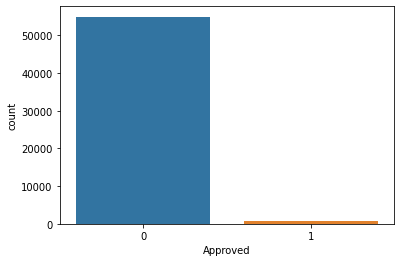

In [ ]:
sns.countplot(y_train)

handle imbalance with smote

In [ ]:
smote=SMOTE()
x_train_smote ,y_train_smote=smote.fit_resample(x_train,y_train)

In [ ]:
x_train_smote

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2,Monthly_Income,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,4.0,1500.000000,...,0,1,1,0,0,0,0,0,0,0
1,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,4.0,2100.000000,...,0,0,0,0,0,0,1,0,0,0
2,0.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,4.0,2681.300000,...,0,1,0,0,1,0,0,0,0,0
3,1.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,4.0,1780.000000,...,0,1,0,1,0,0,1,0,0,0
4,1.000000,1.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,4.0,3650.000000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109879,0.564916,1.0,0.435084,0.000000,0.0,0.0,0.0,0.564916,4.0,2556.491619,...,0,0,0,0,0,0,0,0,0,0
109880,1.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,4.0,3126.623774,...,0,0,0,0,0,0,0,0,0,0
109881,1.000000,1.0,0.000000,0.382529,0.0,0.0,0.0,0.617471,4.0,7500.000000,...,0,0,0,0,0,0,0,0,0,0
109882,1.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,4.0,2009.364093,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_smote.value_counts()

0    54942
1    54942
Name: Approved, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


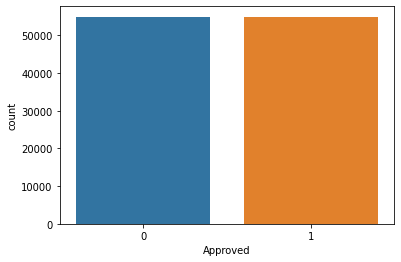

In [ ]:
sns.countplot(y_train_smote)

**Feature Scaling**

Scaling With Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()             # x_train,x_test
scaler.fit(x_train)                                          
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-1.53396803, -1.36064043,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       [-1.53396803,  0.73494803,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       [-1.53396803,  0.73494803,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       ...,
       [ 0.65190407,  0.73494803, -0.86620662, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       [-1.53396803, -1.36064043,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       [-1.53396803,  0.73494803,  1.15445896, ..., -0.4314085 ,
         2.34120214, -0.4335705 ]])

In [ ]:
x_test_scaled

array([[ 0.65190407, -1.36064043,  1.15445896, ...,  2.31798861,
        -0.42713099, -0.4335705 ],
       [ 0.65190407,  0.73494803,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       [ 0.65190407,  0.73494803,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       ...,
       [-1.53396803,  0.73494803, -0.86620662, ...,  2.31798861,
        -0.42713099, -0.4335705 ],
       [-1.53396803,  0.73494803,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ],
       [ 0.65190407,  0.73494803,  1.15445896, ..., -0.4314085 ,
        -0.42713099, -0.4335705 ]])

In [ ]:
data=x_train_scaled
columns=scaler.get_feature_names_out()
x_train_scaled=pd.DataFrame(data=data,columns=columns)
x_train_scaled

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2,Monthly_Income,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,-1.533968,-1.360640,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-0.820493,...,-0.341746,2.220459,1.692583,-0.505134,-0.434388,-0.377631,-0.300962,-0.431409,-0.427131,-0.433571
1,-1.533968,0.734948,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-0.404981,...,-0.341746,-0.450357,-0.590813,-0.505134,-0.434388,-0.377631,3.322674,-0.431409,-0.427131,-0.433571
2,-1.533968,0.734948,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-0.002418,...,-0.341746,2.220459,-0.590813,-0.505134,2.302092,-0.377631,-0.300962,-0.431409,-0.427131,-0.433571
3,0.651904,0.734948,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-0.626587,...,-0.341746,2.220459,-0.590813,1.979672,-0.434388,-0.377631,3.322674,-0.431409,-0.427131,-0.433571
4,0.651904,0.734948,-0.866207,2.268964,-0.085538,-0.122323,-0.081732,-0.782880,0.0,0.668427,...,-0.341746,-0.450357,-0.590813,1.979672,-0.434388,-0.377631,-0.300962,-0.431409,-0.427131,-0.433571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55753,-1.533968,0.734948,-0.866207,2.268964,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-0.231850,...,-0.341746,-0.450357,-0.590813,-0.505134,-0.434388,-0.377631,-0.300962,-0.431409,-0.427131,-0.433571
55754,0.651904,-1.360640,-0.866207,-0.440730,11.690769,-0.122323,-0.081732,-0.782880,0.0,-1.513015,...,-0.341746,2.220459,-0.590813,-0.505134,-0.434388,-0.377631,-0.300962,-0.431409,-0.427131,2.306430
55755,0.651904,0.734948,-0.866207,-0.440730,-0.085538,-0.122323,-0.081732,1.277335,0.0,-0.903596,...,-0.341746,-0.450357,1.692583,-0.505134,-0.434388,-0.377631,3.322674,-0.431409,-0.427131,-0.433571
55756,-1.533968,-1.360640,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-1.256782,...,2.926148,-0.450357,1.692583,-0.505134,-0.434388,-0.377631,-0.300962,-0.431409,-0.427131,-0.433571


In [ ]:
data=x_test_scaled
columns=scaler.get_feature_names_out()
x_test_scaled=pd.DataFrame(data=data,columns=columns)
x_test_scaled

,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Employer_Category2,Monthly_Income,...,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.651904,-1.360640,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-0.127972,...,-0.341746,2.220459,-0.590813,-0.505134,-0.434388,-0.377631,-0.300962,2.317989,-0.427131,-0.433571
1,0.651904,0.734948,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,1.949592,...,-0.341746,-0.450357,1.692583,-0.505134,-0.434388,2.648086,-0.300962,-0.431409,-0.427131,-0.433571
2,0.651904,0.734948,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,2.780617,...,-0.341746,-0.450357,-0.590813,-0.505134,-0.434388,2.648086,-0.300962,-0.431409,-0.427131,-0.433571
3,0.651904,-1.360640,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,-0.349579,...,-0.341746,-0.450357,1.692583,-0.505134,-0.434388,-0.377631,3.322674,-0.431409,-0.427131,-0.433571
4,0.651904,0.734948,-0.866207,-0.440730,-0.085538,-0.122323,-0.081732,1.277335,0.0,0.356793,...,-0.341746,-0.450357,-0.590813,1.979672,-0.434388,-0.377631,-0.300962,-0.431409,-0.427131,2.306430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,0.651904,0.734948,-0.866207,-0.440730,-0.085538,-0.122323,-0.081732,1.277335,0.0,-0.127972,...,2.926148,-0.450357,-0.590813,-0.505134,-0.434388,-0.377631,-0.300962,-0.431409,2.341202,-0.433571
13936,0.651904,0.734948,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,0.910810,...,-0.341746,-0.450357,-0.590813,1.979672,-0.434388,-0.377631,-0.300962,-0.431409,2.341202,-0.433571
13937,-1.533968,0.734948,-0.866207,2.268964,-0.085538,-0.122323,-0.081732,-0.782880,0.0,0.010532,...,-0.341746,-0.450357,-0.590813,-0.505134,-0.434388,-0.377631,-0.300962,2.317989,-0.427131,-0.433571
13938,-1.533968,0.734948,1.154459,-0.440730,-0.085538,-0.122323,-0.081732,-0.782880,0.0,2.849870,...,-0.341746,-0.450357,-0.590813,1.979672,-0.434388,-0.377631,-0.300962,-0.431409,-0.427131,-0.433571
